<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [40]:
# A:
nhl = pd.read_csv(local_csv)
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [41]:
nhl.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

National Hockey League statistics:

* **PTS** - (scoring) Points  *

* **TOI** - Time On Ice

* **GF** - Goals For  *

* **GA** - Goals Against

* **GF60** - rate of goals for that team per 60 mins of play

* **GA60** - rate of goals against that team per 60 mins of play

* **GF%** - Goals Against divided by Goals For

* **SF** - Shots For  *

* **SA** - Shots Against

* **SF60** - Shots For per 60 mins

* **SA60** - Shots Against per 60 mins

* **SF%** - Shots For divided by Shots Against

* **FF** - Count of Fenwick for the team while player is on ice

* **FA** - Count of Fenwick againt the team while player is on ice

* **FF60** - Count of Fenwick rate for the team while player is on ice per 60 mins 

* **FA60** - Count of Fenwick rate against the team while player is on ice per 60 mins 

* **FF%** - Percentage rate of Count of Fenwick for that team

* **CF** - Shots attempted For that team

* **CA** - Shots attempted Against that team

* **CF60** - rate of Shots attempted For that team per 60 mins

* **CA60** - rate of Shots attempted Against that team per 60 mins

* **CF%** - rate of Shots attempted For divided by Shots attempted Against

* **Sh%** - Shot Percentage by athlete  *

* **Sv%** - Save Percentage by goalie

* **PDO** - Sum of team's Shooting Average  *

* **PIM** - Penalties In Minutes


In [42]:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

### 2. Perform any required data cleaning. Do some EDA.

In [43]:
# A:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [44]:
nhl.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [45]:
# 90 rows, 28 columns
nhl.shape

(90, 28)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [46]:
# A:
nhl['Rank'].nunique()

3

In [47]:
nhl['Rank'].unique()

array([1, 2, 3], dtype=int64)

In [48]:
nhl['Rank'].value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

In [49]:
y = nhl.Rank

### 4. What is the baseline accuracy?

Baseline is ~17% (proportion of class: rank 3)

In [50]:
# A: Number of unique observations divided by total number of observations (90)
y.value_counts()/y.count()

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [51]:
# A: 
predictors = ['PTS', 'GF', 'Sh%', 'PDO']
X = nhl[predictors]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [52]:
# A:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [54]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


In [ ]:
# We can't trust the accuracy as evaluated on the data we trained on with k=1, 
# it will always be 100% probability of predicted value being accurate since it only had 1 neighbour

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Test the model on the testing set, and compare the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8222222222222222


In [ ]:
# 82% is not a bad score...which is surprising as this we are testing accuracy on unseen data

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data. Remember! It is not the same as the original data set.

In [59]:
# A:
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [60]:
pred_class = knn.predict(X_test)

In [61]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8222222222222222


In [ ]:
# Accuracy score is exactly the same! This does not tell us what is the best k-value

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [62]:
# A:
test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

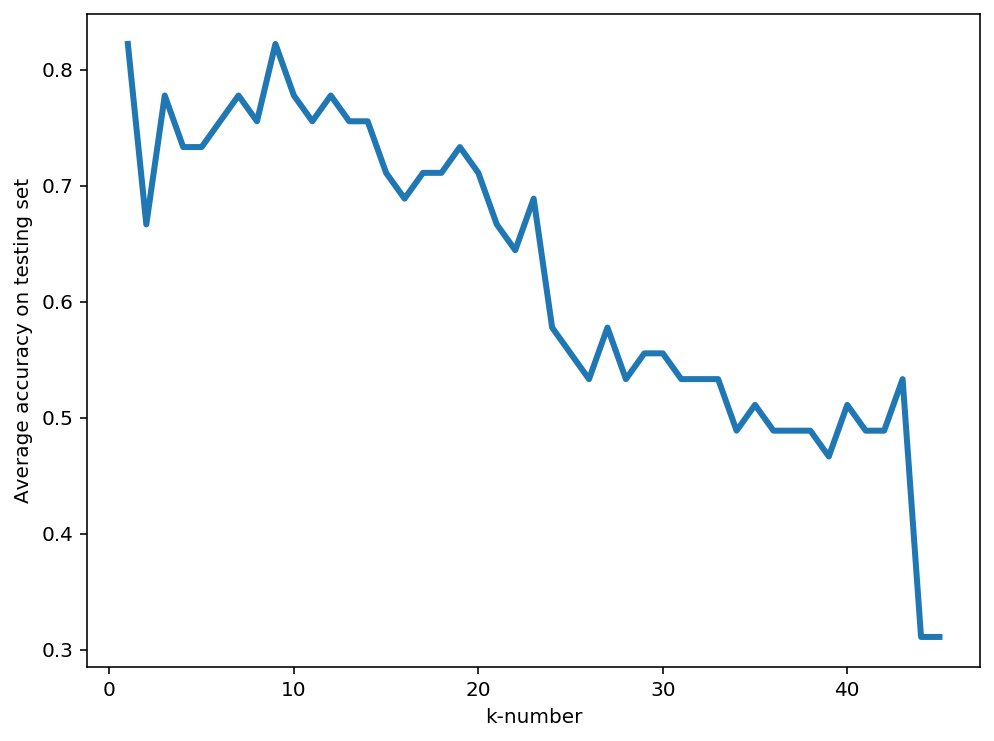

In [64]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.xlabel('k-number')
plt.ylabel('Average accuracy on testing set')
plt.show();

In [ ]:
# Looks like k=1 and k=10 yields the best average accuracy on testing set
# As k-value rises, model complexity increases and average accuracy penalizes the model as it gets more complex 

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds (you don't need train-test split).

In [65]:
# Cross-Validation removes issue of high-variance estimate from train-test splitting the data
from sklearn.model_selection import cross_val_score

folds = 5
# floor() method returns largest integer not greater than X, i.e. round up!
# We divide by 5 because there are 5 folds/groupings of data
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)
print(max_neighbors)

72.0


In [67]:
# plot testing accuracy average against number of neighbors:
test_acc = []

for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

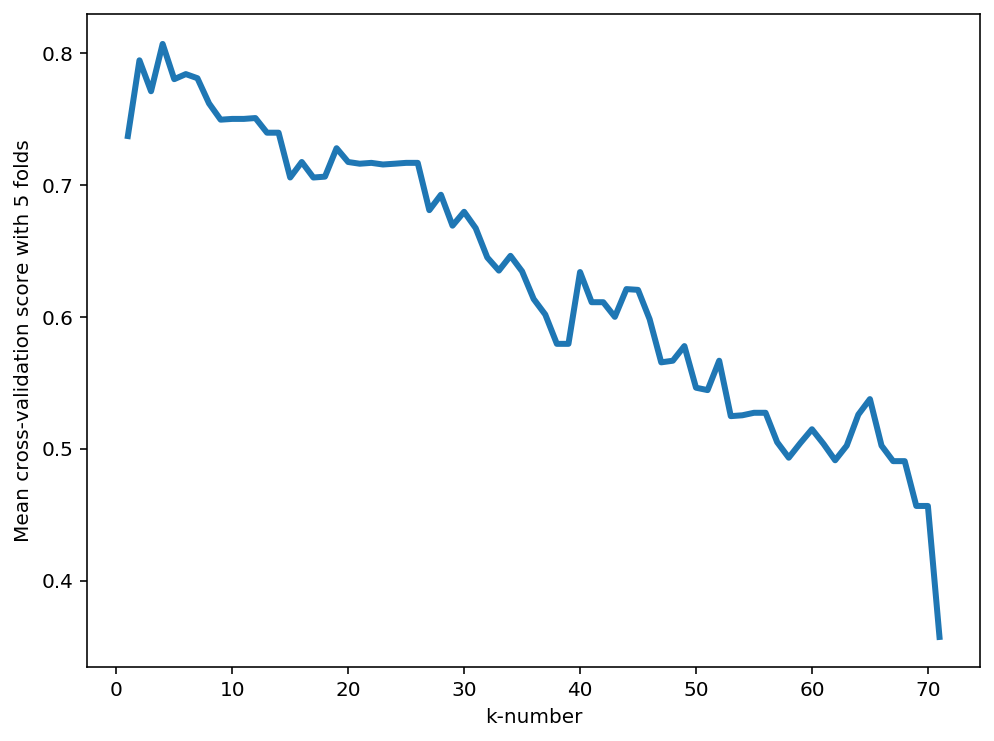

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.xlabel('k-number')
plt.ylabel('Mean cross-validation score with 5 folds')
plt.show();

In [ ]:
# The best k-value is 4 as after that the accuracy decreases due to over-fitting

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [70]:
# A:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [71]:
# plot test accuracy by number of neighbors:
test_acc_std = []

for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

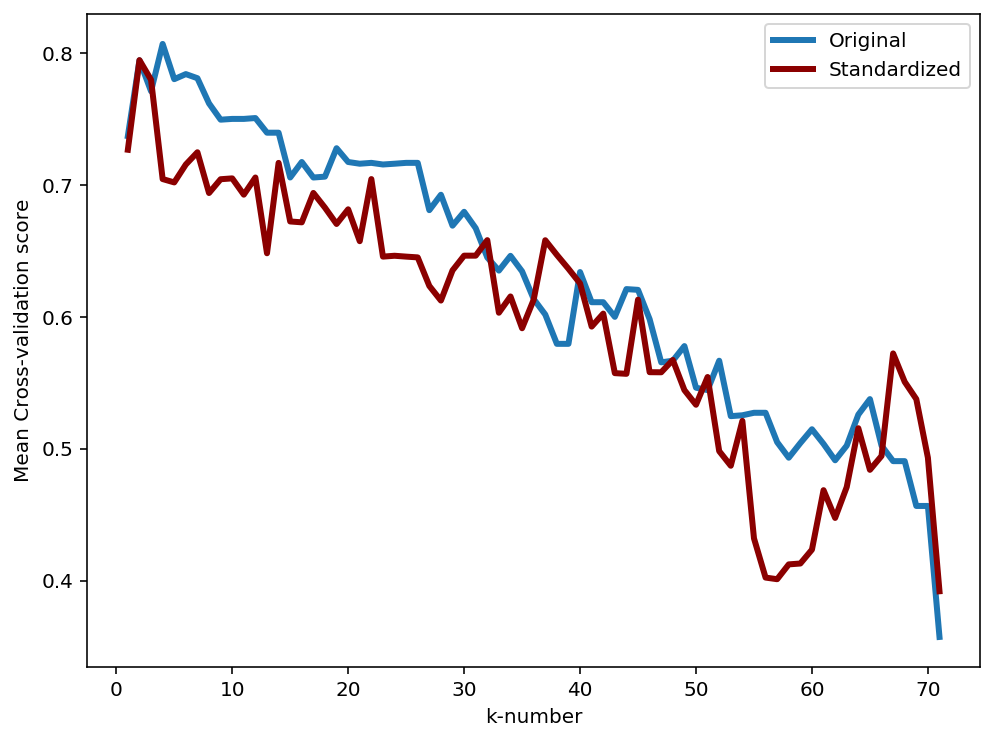

In [75]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3., label='Original')
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., label='Standardized', color='darkred')
plt.xlabel('k-number')
plt.ylabel('Mean Cross-validation score')
plt.legend()
plt.show();

In [ ]:
# Best k-value is 2 for standardized features matrix and knn classification
# This is best approach because it makes sure that scale of predictor variables do not impact the distance between neighbours